### Load MNIST data

In [1]:
import numpy as np

from sklearn.utils import shuffle
from sklearn.datasets import fetch_mldata

In [2]:
mnist = fetch_mldata('MNIST original', data_home='.')

The dataset contains 70,000 images of 28x28=784 pixels each.

In [3]:
mnist.data.shape

(70000, 784)

In [4]:
mnist.target.shape

(70000,)

### Data exploration

In [5]:
np.unique(mnist.target)

array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.])

In [6]:
mnist.data[0].shape

(784,)

In [7]:
mnist.target[0]

0.0

### Visualization

In [14]:
# visualize using some ascii art
import random

index = random.randint(0,len(mnist.data)-1) # visualize a random number from the MNIST data

pixels = mnist.data[index].reshape((28, 28))

for row in pixels:
    [print('{:^4}'.format(pixel), end='') for pixel in row]
    print()

 0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  
 0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  
 0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  163 203  0   0   0   0   0   0   0   0   0   0   0  
 0   0   0   0   0   0   0   0   0   0   0   0   0   0  163 243 203  0   0   0   0   0   0   0   0   0   0   0  
 0   0   0   0   0   0   0   0   0   0   0   0   0   82 254 253 203  0   0   0   0   0   0   0   0   0   0   0  
 0   0   0   0   0   0   0   0   0   0   0   0   0  203 253 252  81  0   0   0   0   0   0   0   0   0   0   0  
 0   0   0   0   0   0   0   0   0   0   0   0  132 253 224  81  0   0   0   0   0   0   0   0   0   0   0   0  
 0   0   0   0   0   0   0   0   0   0   0   0  253 252 102  0   0   0   0   0   0   0   0   0   0   0   0   0  
 0   0   0   0   0   0   0   0   0   0   0  163 254 172  0   0   0   0   0   0   0   0   0   0  

In [15]:
import random
import matplotlib.pyplot as plt

%matplotlib inline

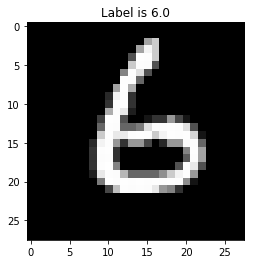

In [16]:
pixels = np.array(mnist.data[index], dtype='uint8')

# Reshape the array into 28 x 28 array (2-dimensional array)
pixels = pixels.reshape((28, 28))

# Plot
plt.title('Label is {label}'.format(label=mnist.target[index]))
plt.imshow(pixels, cmap='gray')
plt.show()

### Preprocessing

In [17]:
mnist.data = mnist.data/255.0*2 - 1

In [18]:
x_train = mnist.data[:60000]
y_train = mnist.target[:60000]

x_test  = mnist.data[60000:]
y_test  = mnist.target[60000:]

In [19]:
X = x_train
y = y_train.astype(np.uint8)

Xt = x_test
yt = y_test.astype(np.uint8)

In [20]:
def unison_shuffled_copies(a, b):
    assert len(a) == len(b)
    p = np.random.permutation(len(a))
    return a[p], b[p]

In [21]:
X, y = unison_shuffled_copies(X, y)

### Two layer neural network in numpy

In [30]:
h = 512 # size of hidden layer
W = 0.01 * np.random.randn(X.shape[1],h)
b = np.zeros((1,h))
K = 10 # number of classes
W2 = 0.01 * np.random.randn(h,K)
b2 = np.zeros((1,K))
# some hyperparameters
step_size = 0.01 # 1e-0
reg = 1e-3 # regularization strength

batch_size=128

# gradient descent loop
num_examples = X.shape[0]
for i in range(5100):
          
    num_train = X.shape[0]
    iterations_per_epoch = max(num_train / batch_size, 1)
    
    batch_idxes = np.random.choice(num_train, batch_size, replace=True)
    X_batch = X[batch_idxes, :]
    y_batch = y[batch_idxes]
    
    # evaluate class scores, [N x K]
    hidden_layer = np.maximum(0, np.dot(X_batch, W) + b) # note, ReLU activation
    scores = np.dot(hidden_layer, W2) + b2

    # compute the class probabilities
    exp_scores = np.exp(scores)
    probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True) # [N x K]

    # compute the loss: average cross-entropy loss and regularization
    corect_logprobs = -np.log(probs[range(batch_size),y_batch])
    data_loss = np.sum(corect_logprobs)/batch_size
    reg_loss = 0.5*reg*np.sum(W*W) + 0.5*reg*np.sum(W2*W2)
    loss = data_loss + reg_loss
    if i % 100 == 0:
        print("iteration %d: loss %f" % (i, loss))

    # compute the gradient on scores
    dscores = probs
    dscores[range(batch_size),y_batch] -= 1
    dscores /= batch_size

    # backpropate the gradient to the parameters
    # first backprop into parameters W2 and b2
    dW2 = np.dot(hidden_layer.T, dscores)
    db2 = np.sum(dscores, axis=0, keepdims=True)
    # next backprop into hidden layer
    dhidden = np.dot(dscores, W2.T)
    # backprop the ReLU non-linearity
    dhidden[hidden_layer <= 0] = 0
    # finally into W,b
    dW = np.dot(X_batch.T, dhidden)
    db = np.sum(dhidden, axis=0, keepdims=True)

    # add regularization gradient contribution
    dW2 += reg * W2
    dW += reg * W

    # perform a parameter update
    W += -step_size * dW
    b += -step_size * db
    W2 += -step_size * dW2
    b2 += -step_size * db2

iteration 0: loss 2.322308
iteration 100: loss 1.984647
iteration 200: loss 1.431346
iteration 300: loss 1.062887
iteration 400: loss 0.690352
iteration 500: loss 0.558953
iteration 600: loss 0.535156
iteration 700: loss 0.463688
iteration 800: loss 0.447985
iteration 900: loss 0.403202
iteration 1000: loss 0.585579
iteration 1100: loss 0.446848
iteration 1200: loss 0.326479
iteration 1300: loss 0.493121
iteration 1400: loss 0.445217
iteration 1500: loss 0.432230
iteration 1600: loss 0.346519
iteration 1700: loss 0.485739
iteration 1800: loss 0.383756
iteration 1900: loss 0.386374
iteration 2000: loss 0.237091
iteration 2100: loss 0.423637
iteration 2200: loss 0.315242
iteration 2300: loss 0.369491
iteration 2400: loss 0.484731
iteration 2500: loss 0.311369
iteration 2600: loss 0.259375
iteration 2700: loss 0.498405
iteration 2800: loss 0.341113
iteration 2900: loss 0.442184
iteration 3000: loss 0.333467
iteration 3100: loss 0.359184
iteration 3200: loss 0.311288
iteration 3300: loss 0

In [31]:
# evaluate training set accuracy
hidden_layer = np.maximum(0, np.dot(X, W) + b)
scores = np.dot(hidden_layer, W2) + b2
predicted_class = np.argmax(scores, axis=1)
print('training accuracy: %.2f' % (np.mean(predicted_class == y)))

training accuracy: 0.92


### Test accuracy

In [32]:
hidden_layer = np.maximum(0, np.dot(Xt, W) + b)
scores = np.dot(hidden_layer, W2) + b2
predicted_class = np.argmax(scores, axis=1)
print('test accuracy: %.2f' % (np.mean(predicted_class == yt)))

test accuracy: 0.93


### Test some random digits

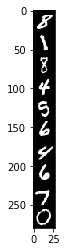

In [33]:
batch_size 
batch_idxes = np.random.choice(len(Xt), 10, replace=True)
X_batch = Xt[batch_idxes, :]
    
pixels = X_batch # np.array(mnist.data[index], dtype='uint8')

# Reshape the array into 28 x 28 array (2-dimensional array)
pixels = pixels.reshape((280,28))

# Plot
plt.imshow(pixels, cmap='gray')
plt.show()

Let's test what the classifier classifies the above digits as:

In [34]:
hidden_layer = np.maximum(0, np.dot(X_batch, W) + b)
scores = np.dot(hidden_layer, W2) + b2
predicted_class = np.argmax(scores, axis=1)
predicted_class

array([8, 1, 8, 4, 5, 6, 4, 6, 7, 0], dtype=int64)

# Using Keras with Tensorflow backend

In [35]:
import keras
from keras import models
from keras import layers

C:\Users\rohit\Anaconda3\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [36]:
network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28*28,)))
network.add(layers.Dense(10, activation='softmax'))

In [37]:
sgd = keras.optimizers.SGD(lr=0.01, momentum=0.0, decay=0.0, nesterov=False)

In [38]:
network.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])

In [39]:
from keras.utils import to_categorical

train_labels = to_categorical(y)
test_labels = to_categorical(yt)

In [40]:
network.fit(X, train_labels, epochs=5, batch_size=128)

Epoch 1/5
60000/60000 [==============================] - 7s 115us/step - loss: 0.6495 - acc: 0.8262
Epoch 2/5
60000/60000 [==============================] - 7s 109us/step - loss: 0.3669 - acc: 0.8977
Epoch 3/5
60000/60000 [==============================] - 7s 114us/step - loss: 0.3209 - acc: 0.9092
Epoch 4/5
60000/60000 [==============================] - 7s 117us/step - loss: 0.2952 - acc: 0.9162
Epoch 5/5
60000/60000 [==============================] - 8s 127us/step - loss: 0.2761 - acc: 0.9223


In [41]:
test_loss, test_acc = network.evaluate(Xt, test_labels)
print('test_acc:', test_acc)

10000/10000 [==============================] - 1s 136us/step
test_acc: 0.9268


### Changing optimizer to rmsprop

In [30]:
network2 = models.Sequential()
network2.add(layers.Dense(512, activation='relu', input_shape=(28*28,)))
network2.add(layers.Dense(10, activation='softmax'))
network2.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [32]:
network2.fit(X, train_labels, epochs=5, batch_size=128)

Epoch 1/5
60000/60000 [==============================] - 8s 130us/step - loss: 0.4530 - acc: 0.8754
Epoch 2/5
60000/60000 [==============================] - 8s 127us/step - loss: 0.1531 - acc: 0.9532
Epoch 3/5
60000/60000 [==============================] - 8s 126us/step - loss: 0.1118 - acc: 0.9653
Epoch 4/5
60000/60000 [==============================] - 8s 126us/step - loss: 0.0896 - acc: 0.9720
Epoch 5/5
60000/60000 [==============================] - 8s 125us/step - loss: 0.0755 - acc: 0.9757


In [33]:
test_loss, test_acc = network2.evaluate(Xt, test_labels)
print('test_acc:', test_acc)

10000/10000 [==============================] - 1s 102us/step
test_acc: 0.958


In [ ]:
# note: keras also includes MNIST and in an easier to use format:

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images.reshape((60000, 28*28))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28*28))
test_images = test_images.astype('float32') / 255